In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!cp -r /kaggle/input/pcb-defect-dataset /kaggle/working


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 16.6 MB/s eta 0:00:00a 0:00:01


In [4]:
import os
import matplotlib.pyplot as plt

In [5]:
os.chdir('/kaggle/working/pcb-defect-dataset/pcb-defect-dataset')

In [6]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 77.4MB/s]


In [8]:
import yaml

# Load the YAML file
with open('/kaggle/working/pcb-defect-dataset/pcb-defect-dataset/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Print the content of the YAML file
print(data)


{'path': '../pcb-defect-dataset', 'train': 'train', 'val': 'val', 'test': 'test', 'names': {0: 'mouse_bite', 1: 'spur', 2: 'missing_hole', 3: 'short', 4: 'open_circuit', 5: 'spurious_copper'}}


In [9]:
data['path'] = '/kaggle/working/pcb-defect-dataset/pcb-defect-dataset'
with open('/kaggle/working/pcb-defect-dataset/pcb-defect-dataset/data.yaml', 'w') as file:
    yaml.safe_dump(data, file)

print("YAML file updated!")

YAML file updated!


In [10]:
results = model.train(data="data.yaml", epochs=25, imgsz=640)


Ultralytics 8.3.69 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

100%|██████████| 755k/755k [00:00<00:00, 18.1MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 71.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/pcb-defect-dataset/pcb-defect-dataset/train/labels... 6370 images, 2164 backgrounds, 0 corrupt: 100%|██████████| 8534/8534 [00:07<00:00, 1158.51it/s]


train: New cache created: /kaggle/working/pcb-defect-dataset/pcb-defect-dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/pcb-defect-dataset/pcb-defect-dataset/val/labels... 802 images, 264 backgrounds, 0 corrupt: 100%|██████████| 1066/1066 [00:00<00:00, 1113.18it/s]

val: New cache created: /kaggle/working/pcb-defect-dataset/pcb-defect-dataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25       2.2G      2.303      4.388      1.415         16        640: 100%|██████████| 534/534 [01:32<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]


                   all       1066       1595      0.549      0.636      0.566      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.26G      1.923      2.026      1.224          8        640: 100%|██████████| 534/534 [01:30<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.59it/s]

                   all       1066       1595      0.715      0.785      0.789      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.23G      1.878      1.524      1.201         12        640: 100%|██████████| 534/534 [01:28<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.55it/s]

                   all       1066       1595      0.793      0.831      0.869      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.22G      1.843      1.347      1.182         19        640: 100%|██████████| 534/534 [01:27<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.54it/s]

                   all       1066       1595      0.851      0.851      0.891      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.23G        1.8      1.217      1.161         13        640: 100%|██████████| 534/534 [01:28<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.44it/s]

                   all       1066       1595      0.875      0.834      0.914      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.22G      1.765      1.152      1.152         12        640: 100%|██████████| 534/534 [01:27<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.67it/s]

                   all       1066       1595      0.928      0.897      0.948      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.23G      1.739       1.08      1.132         10        640: 100%|██████████| 534/534 [01:28<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.48it/s]

                   all       1066       1595      0.925      0.897      0.947      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.26G       1.73      1.048      1.132          9        640: 100%|██████████| 534/534 [01:28<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.62it/s]

                   all       1066       1595      0.888      0.915       0.93      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.23G      1.711      1.001      1.113         12        640: 100%|██████████| 534/534 [01:29<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.51it/s]

                   all       1066       1595      0.896      0.693      0.846      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.22G      1.695     0.9828      1.116         23        640: 100%|██████████| 534/534 [01:28<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.57it/s]

                   all       1066       1595      0.954      0.933      0.966        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.26G      1.682       0.95      1.102          5        640: 100%|██████████| 534/534 [01:28<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.54it/s]

                   all       1066       1595      0.857      0.919       0.93      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.24G      1.659     0.9201      1.095         12        640: 100%|██████████| 534/534 [01:28<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.73it/s]

                   all       1066       1595      0.933      0.894      0.961      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.16G      1.654     0.8978      1.096         13        640: 100%|██████████| 534/534 [01:26<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.41it/s]

                   all       1066       1595      0.959      0.952      0.976      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.22G       1.63     0.8698      1.091         12        640: 100%|██████████| 534/534 [01:28<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.45it/s]

                   all       1066       1595      0.956      0.952      0.975      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.25G      1.623     0.8542      1.086         13        640: 100%|██████████| 534/534 [01:27<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.38it/s]

                   all       1066       1595      0.966      0.961      0.981      0.532


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.22G      1.603     0.8005      1.127          7        640: 100%|██████████| 534/534 [01:26<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.60it/s]

                   all       1066       1595      0.972      0.957      0.976      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.23G      1.587     0.7615      1.118         10        640: 100%|██████████| 534/534 [01:26<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.61it/s]

                   all       1066       1595      0.968      0.965      0.981      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.22G       1.57     0.7427      1.111          7        640: 100%|██████████| 534/534 [01:25<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]

                   all       1066       1595      0.974      0.973      0.982      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.23G      1.561     0.7341       1.11          4        640: 100%|██████████| 534/534 [01:26<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.65it/s]

                   all       1066       1595      0.973      0.973      0.985       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.22G      1.541     0.7154      1.101          3        640: 100%|██████████| 534/534 [01:25<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.67it/s]

                   all       1066       1595      0.974       0.97      0.983      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.23G      1.532     0.6941        1.1         11        640: 100%|██████████| 534/534 [01:25<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.69it/s]

                   all       1066       1595      0.974      0.978      0.986      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.22G      1.515     0.6826      1.093         12        640: 100%|██████████| 534/534 [01:25<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.74it/s]

                   all       1066       1595      0.977      0.976      0.988      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.23G        1.5     0.6733      1.085          8        640: 100%|██████████| 534/534 [01:25<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.78it/s]

                   all       1066       1595      0.978      0.979      0.988      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.22G      1.482     0.6552      1.082          8        640: 100%|██████████| 534/534 [01:25<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.55it/s]

                   all       1066       1595      0.976      0.979      0.987      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.23G      1.466     0.6457      1.075         12        640: 100%|██████████| 534/534 [01:25<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.70it/s]

                   all       1066       1595      0.979      0.981      0.988      0.571



25 epochs completed in 0.656 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.69 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.64it/s]


                   all       1066       1595      0.976      0.978      0.987      0.572
            mouse_bite        140        280      0.975      0.979      0.986      0.575
                  spur        130        262      0.981      0.967      0.988      0.541
          missing_hole        118        229      0.993      0.996      0.995      0.624
                 short        158        327      0.975      0.963      0.977      0.581
          open_circuit        135        259      0.977      0.978      0.992      0.541
       spurious_copper        121        238      0.956      0.987      0.987      0.571


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


In [12]:
import cv2

In [13]:
image = cv2.imread('/kaggle/working/pcb-defect-dataset/pcb-defect-dataset/test/images/l_light_01_missing_hole_04_2_600.jpg')

In [14]:
inference = model.predict(image)


0: 640x640 2 missing_holes, 7.4ms
Speed: 2.9ms preprocess, 7.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'mouse_bite', 1: 'spur', 2: 'missing_hole', 3: 'short', 4: 'open_circuit', 5: 'spurious_copper'}
obb: None
orig_img: array([[[135, 148, 156],
        [132, 145, 153],
        [131, 146, 155],
        ...,
        [127, 148, 140],
        [125, 145, 140],
        [124, 144, 139]],

       [[134, 147, 155],
        [131, 144, 152],
        [129, 144, 153],
        ...,
        [136, 156, 151],
        [137, 157, 152],
        [137, 157, 152]],

       [[133, 146, 154],
        [131, 144, 152],
        [129, 144, 153],
        ...,
        [131, 150, 147],
        [133, 150, 147],
        [133, 150, 147]],

       ...,

       [[178, 174, 180],
        [178, 174, 180],
        [179, 175, 181],
        ...,
        [187, 184, 186],
        [187, 184, 186],
        [187, 184, 186]],

       [[177, 173, 179],
        [178, 174, 180],
        [179, 

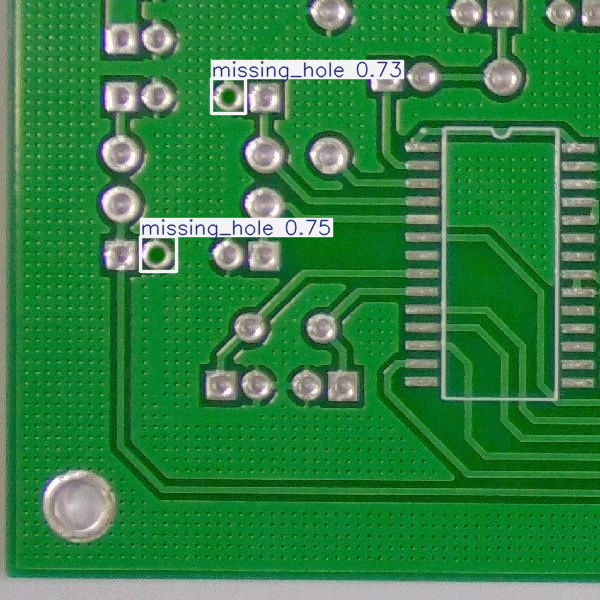

In [16]:
for i in inference:
    print(i)
    i.show()

In [17]:
model.export(format='onnx')
model.export(format='torchscript')

Ultralytics 8.3.69 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 168.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 259.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 254.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 13.3s, installed 2 packages: ['onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 14.4s, saved as 'runs/detect/train/weights/best.onnx' (11.7 M

'runs/detect/train/weights/best.torchscript'


image 1/1 /kaggle/working/pcb-defect-dataset/pcb-defect-dataset/test/images/rotation_90_light_05_missing_hole_03_4_600.jpg: 640x640 1 missing_hole, 7.5ms
Speed: 2.9ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/pcb-defect-dataset/pcb-defect-dataset/test/images/rotation_90_light_10_open_circuit_04_5_600.jpg: 640x640 4 open_circuits, 7.4ms
Speed: 2.7ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/pcb-defect-dataset/pcb-defect-dataset/test/images/rotation_90_light_08_mouse_bite_03_2_600.jpg: 640x640 1 mouse_bite, 7.3ms
Speed: 2.3ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/pcb-defect-dataset/pcb-defect-dataset/test/images/l_light_04_spur_05_2_600.jpg: 640x640 2 spurs, 7.5ms
Speed: 2.2ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


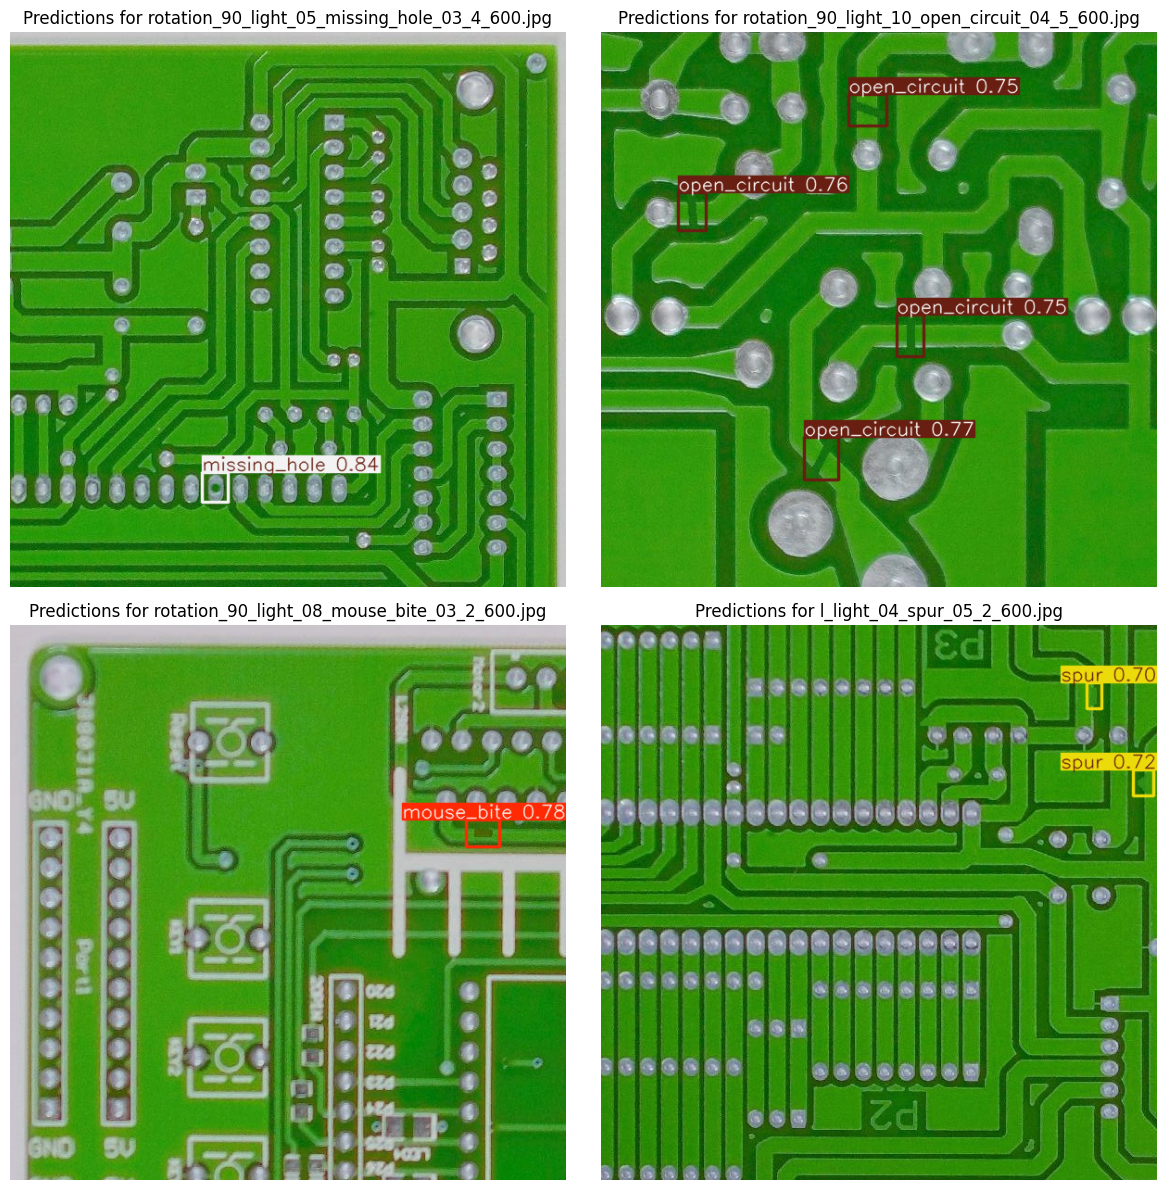

In [21]:
import os
import random
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load the YOLO model (update with your model path)
model = YOLO('runs/detect/train/weights/best.pt')  # Replace 'best.pt' with your model path if different

# Define the test images folder
image_folder = '/kaggle/working/pcb-defect-dataset/pcb-defect-dataset/test/images'

# Get a list of images and randomly select 4
all_images = os.listdir(image_folder)
random_images = random.sample(all_images, 4)

# Create a 2x2 grid for displaying images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for idx, img_name in enumerate(random_images):
    img_path = os.path.join(image_folder, img_name)

    # Use YOLO model to predict on the image
    results = model.predict(source=img_path, save=False, conf=0.25)  # Adjust confidence if needed

    # Load the original image
    img = Image.open(img_path).convert("RGB")

    # Annotate the image with predictions
    annotated_img = results[0].plot()  # Annotated image from YOLO results

    # Display the image
    ax = axes[idx // 2, idx % 2]
    ax.imshow(annotated_img)
    ax.set_title(f"Predictions for {img_name}")
    ax.axis("off")

plt.tight_layout()
plt.show()
